# Analysis of best fitness values

In [32]:
import os
import pickle
from itertools import product

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pycgp import probabilistic_mutation, point_mutation, single_mutation
from pycgp.gems import MatchByActiveStrategy, MatchSMStrategy, MatchPMStrategy

mutations = [
       # (probabilistic_mutation, MatchSMStrategy),
        (point_mutation, MatchPMStrategy),
        (single_mutation, MatchSMStrategy),
        #(single_mutation, MatchByActiveStrategy),
        (probabilistic_mutation, MatchByActiveStrategy)
]

gems = [0, 5, 10]
cols = [10, 50, 100]

def iterate_folder(folder):
    for index, ((mutation, strategy), gem, column) in enumerate(product(mutations, gems, cols)):
        file = os.path.join(folder,  f'{mutation.__name__}-{strategy.__name__}-gems{gem}-n_cols{column}.csv')
        with open (file, 'rb') as fp:
            data = pickle.load(fp)
        
        yield mutation.__name__, strategy.__name__, gem, column, data
    

In [33]:
def density_plots(folder, value_gttr):
    best = []

    for raw in iterate_folder(folder):
            m, s, g, c, data = raw
            best.append([g, m, s] + [value_gttr(x) for x in data])

    df = pd.DataFrame(best)
    df.columns = ['gems', 'mutation', 'strategy', *list(range(1,21))]

    _, axs = plt.subplots(1,3, figsize=(12,3))

    choices = [
        (point_mutation.__name__, MatchPMStrategy.__name__),
        (single_mutation.__name__, MatchSMStrategy.__name__),
        (probabilistic_mutation.__name__, MatchByActiveStrategy.__name__)
    ]

    titles = ['Point mutation', 'Single mutation', 'Probabilistic mutation']
    
    ylims = [
        (0, 5), (0, 5), (0, 5)
    ]
    
    for i, (m, s) in enumerate(choices):
        avgs = []
        nonzero = []
        for g in gems:
            d = df[(df.mutation == m) & (df.strategy == s)]
            values = d.iloc[:,3:][d.gems == g].values.flatten()
            sns.kdeplot(values, ax=axs[i], label=g, shade=True)
            avgs.append(np.mean(values))
            nonzero.append(np.count_nonzero(values == 0))
            
        #axs[i].set_title()
        print('{}\n{}\n0 - {:3f}, {}\n5 - {:3f}, {}\n10 - {:3f}, {}'.format(m,s,avgs[0], nonzero[0], avgs[1], nonzero[1], avgs[2], nonzero[2]))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('Food eaten')
        axs[i].set_ylim(0, 0.016)
        axs[i].set_xlim(0, 89)
    print(df.groupby('gems').median().mean(axis=1))

point_mutation
MatchPMStrategy
0 - 52.533333, 0
5 - 58.550000, 0
10 - 58.716667, 0
single_mutation
MatchSMStrategy
0 - 54.766667, 0
5 - 62.883333, 0
10 - 60.366667, 0
probabilistic_mutation
MatchByActiveStrategy
0 - 52.983333, 0
5 - 51.200000, 0
10 - 50.016667, 0
gems
0     53.40
5     61.35
10    59.20
dtype: float64


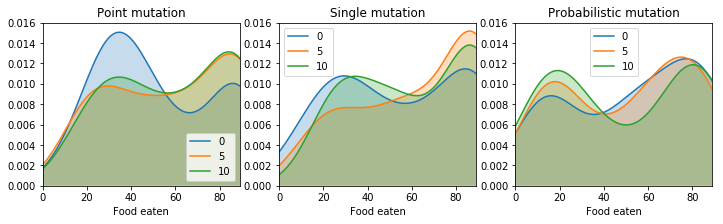

In [34]:
def best_of_run_kdes(folder):
    density_plots(folder, lambda x: -x['best'].fitness)

folders = [
    'scripts/santa_fe_out//'
]
for x in folders:
    best_of_run_kdes(x)
plt.savefig('figures/sa-kdes.pdf', dpi=1000, bbox_inches='tight')
    

In [52]:
data = []
ldata = {}

for m, s, g, c, d in iterate_folder('scripts/santa_fe_out/'):
    values = [-x['best'].fitness for x in d]
    stats = [g, c, np.max(values), np.mean(values), np.std(values)]
    data.append([m, s] + stats)
    ldata[f'{m}-{s}-{g}-{c}'] = stats
    
data = pd.DataFrame([*data]) 
data.columns = ['mutation', 'strategy', 'gems', 'columns', 'min', 'mean', 'std']
#data

In [53]:
print(data.groupby('gems')['min'].mean())
print(data.groupby('gems')['mean'].mean())

gems
0     81.777778
5     79.888889
10    81.666667
Name: min, dtype: float64
gems
0     53.427778
5     57.544444
10    56.366667
Name: mean, dtype: float64


In [54]:


for k, v in ldata.items():
    row_str = '{} & {} &  {} & {:.2f}\\pm {:.2f}'.format(*v)
    print(row_str)

0 & 10 &  89 & 36.40\pm 18.58
0 & 50 &  89 & 55.10\pm 25.56
0 & 100 &  89 & 66.10\pm 23.22
5 & 10 &  73 & 31.80\pm 15.45
5 & 50 &  89 & 76.30\pm 19.03
5 & 100 &  89 & 67.55\pm 21.78
10 & 10 &  89 & 39.95\pm 21.72
10 & 50 &  89 & 63.45\pm 24.29
10 & 100 &  89 & 72.75\pm 20.30
0 & 10 &  75 & 27.80\pm 14.45
0 & 50 &  89 & 69.05\pm 24.95
0 & 100 &  89 & 67.45\pm 22.41
5 & 10 &  89 & 37.30\pm 22.25
5 & 50 &  89 & 75.20\pm 16.99
5 & 100 &  89 & 76.15\pm 20.42
10 & 10 &  84 & 36.20\pm 17.47
10 & 50 &  89 & 74.50\pm 19.78
10 & 100 &  89 & 70.40\pm 20.59
0 & 10 &  39 & 16.50\pm 7.81
0 & 50 &  88 & 62.10\pm 12.58
0 & 100 &  89 & 80.35\pm 10.42
5 & 10 &  29 & 15.95\pm 4.62
5 & 50 &  83 & 59.75\pm 14.45
5 & 100 &  89 & 77.90\pm 12.23
10 & 10 &  28 & 15.55\pm 5.13
10 & 50 &  89 & 53.30\pm 23.03
10 & 100 &  89 & 81.20\pm 5.62


In [339]:
data = []

for m, s, g, c, d in iterate_folder('scripts/symbolic_basic'):
    if c != 100:
        continue
    values = [x['best'].fitness for x in d]
    data.append([m, s, g, *values])

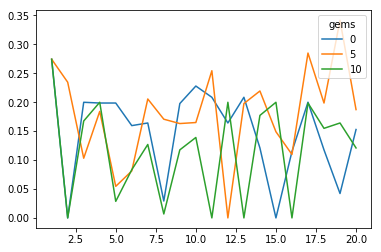

In [341]:
dd = pd.DataFrame(data)
dd.columns = ['m','s', 'gems', *list(range(1,21))]
dd.groupby('gems').min().iloc[:,2:].T.plot()